### Random Sample Imputation

Aim : Random Sample Imputation consists of random sample observations from the dataset use those obseravtions to fill the na values in the dataset

When should we use Random Sample Imputation ? When the data is missing completely at random

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv', usecols=['Age', 'Survived', 'Fare'])

In [3]:
df

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500
...,...,...,...
886,0,27.0,13.0000
887,1,19.0,30.0000
888,0,NaN,23.4500
889,1,26.0,30.0000


In [4]:
df.isnull().mean()

Survived    0.000000
Age         0.198653
Fare        0.000000
dtype: float64

In [5]:
df

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500
...,...,...,...
886,0,27.0,13.0000
887,1,19.0,30.0000
888,0,NaN,23.4500
889,1,26.0,30.0000


In [6]:
def imputate_variable(dataframe, variable):
    dataframe[variable+'_median'] = dataframe[variable].fillna(value=dataframe[variable].median())
    dataframe[variable+'_random'] = dataframe[variable]
    random_sample = dataframe[variable].dropna().sample(dataframe[variable].isnull().sum(), random_state=0)
    random_sample.index = dataframe[dataframe[variable].isnull()].index
    dataframe.loc[dataframe[dataframe[variable].isnull()].index, variable+'_random'] = random_sample

In [7]:
imputate_variable(df, 'Age')

In [8]:
df

,Survived,Age,Fare,Age_median,Age_random
0,0,22.0,7.2500,22.0,22.0
1,1,38.0,71.2833,38.0,38.0
2,1,26.0,7.9250,26.0,26.0
3,1,35.0,53.1000,35.0,35.0
4,0,35.0,8.0500,35.0,35.0
...,...,...,...,...,...
886,0,27.0,13.0000,27.0,27.0
887,1,19.0,30.0000,19.0,19.0
888,0,NaN,23.4500,28.0,15.0
889,1,26.0,30.0000,26.0,26.0


In [9]:
df.isnull().mean()

Survived      0.000000
Age           0.198653
Fare          0.000000
Age_median    0.000000
Age_random    0.000000
dtype: float64

In [10]:
import matplotlib.pyplot as plt

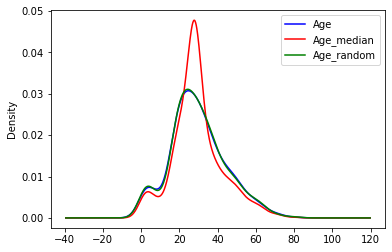

In [11]:
fig = plt.figure()
ax = fig.add_subplot(111)
df['Age'].plot(kind = 'kde', color = 'blue')
df['Age_median'].plot(kind = 'kde', color = 'red')
df['Age_random'].plot(kind = 'kde', color = 'green')
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

### Advantages:
    Easy To implement
    There is less distortion in variance
### Disadvantage:
    Every situation randomness wont work

# Capturing NAN values with a new feature
It works well if the data are not missing completely at random

In [12]:
df = pd.read_csv('https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv', usecols=['Age', 'Survived', 'Fare'])

In [13]:
df

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500
...,...,...,...
886,0,27.0,13.0000
887,1,19.0,30.0000
888,0,NaN,23.4500
889,1,26.0,30.0000


In [14]:
df.isnull().mean()

Survived    0.000000
Age         0.198653
Fare        0.000000
dtype: float64

In [15]:
import numpy as np

In [16]:
def imputate_nan(dataframe, variable):
    dataframe[variable+'_nan'] = np.where(dataframe[variable].isnull(), 1, 0)

In [17]:
imputate_nan(df, 'Age')

In [18]:
df

,Survived,Age,Fare,Age_nan
0,0,22.0,7.2500,0
1,1,38.0,71.2833,0
2,1,26.0,7.9250,0
3,1,35.0,53.1000,0
4,0,35.0,8.0500,0
...,...,...,...,...
886,0,27.0,13.0000,0
887,1,19.0,30.0000,0
888,0,NaN,23.4500,1
889,1,26.0,30.0000,0


In [19]:
df['Age_nan'].value_counts()

0    714
1    177
Name: Age_nan, dtype: int64

### Advantages
    Easy to implement
    Captures the importance of missing values
### Disadvantages
    Creating Additional Features(Curse of Dimensionality)

# End of Distribution imputation

In [20]:
df = pd.read_csv('https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv', usecols=['Age', 'Fare', 'Survived'])

In [21]:
df

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500
...,...,...,...
886,0,27.0,13.0000
887,1,19.0,30.0000
888,0,NaN,23.4500
889,1,26.0,30.0000


In [22]:
df.isnull().mean()

Survived    0.000000
Age         0.198653
Fare        0.000000
dtype: float64

In [23]:
import seaborn as sns

In [24]:
import warnings
warnings.filterwarnings('ignore')

<AxesSubplot:xlabel='Age'>

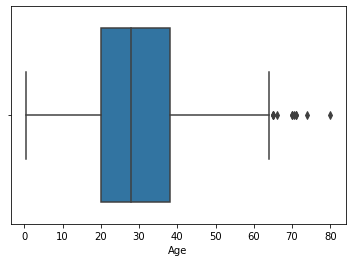

In [25]:
sns.boxplot(df['Age'])

In [26]:
extreme = df['Age'].mean() + 3 * df['Age'].std()

We take the value form the right side end of the distribution beacause it is right skewed or else we take the value from the left side end of the distribution value

In [27]:
def imputate_nan(dataframe, variable):
    dataframe[variable+'_extreme'] = dataframe[variable].fillna(extreme)

In [28]:
imputate_nan(df, 'Age')

In [29]:
df

,Survived,Age,Fare,Age_extreme
0,0,22.0,7.2500,22.00000
1,1,38.0,71.2833,38.00000
2,1,26.0,7.9250,26.00000
3,1,35.0,53.1000,35.00000
4,0,35.0,8.0500,35.00000
...,...,...,...,...
886,0,27.0,13.0000,27.00000
887,1,19.0,30.0000,19.00000
888,0,NaN,23.4500,73.27861
889,1,26.0,30.0000,26.00000


In [30]:
df.isnull().sum()

Survived         0
Age            177
Fare             0
Age_extreme      0
dtype: int64

<AxesSubplot:xlabel='Age_extreme'>

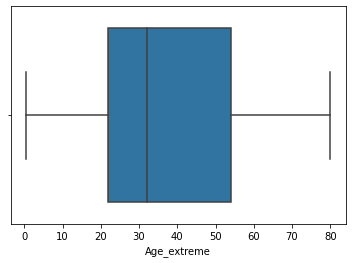

In [31]:
sns.boxplot(df['Age_extreme'])

<AxesSubplot:>

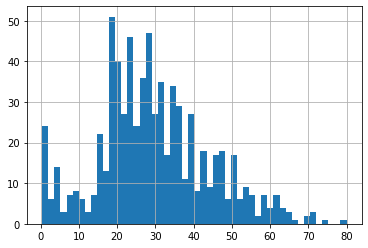

In [33]:
df['Age'].hist(bins = 50)

<AxesSubplot:>

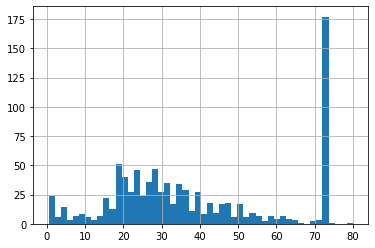

In [34]:
df['Age_extreme'].hist(bins = 50)

<AxesSubplot:xlabel='Age', ylabel='Density'>

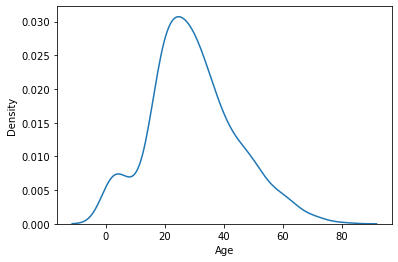

In [35]:
sns.kdeplot(df['Age'])

<AxesSubplot:xlabel='Age_extreme', ylabel='Density'>

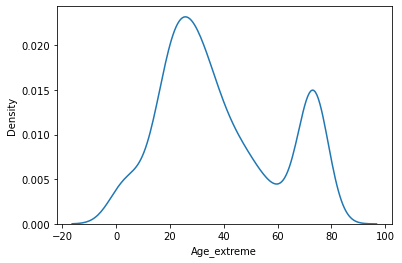

In [36]:
sns.kdeplot(df['Age_extreme'])

In [39]:
def outliers(dataframe, variable):
    q1, q3 = np.quantile(dataframe[variable], [0.25, 0.75])
    print("q1 : ",q1, "q3 : ", q3)
    iqr = q3 - q1
    print("iqr : ", iqr)
    upper_whisker = q3 + 1.5 * iqr
    print("upper_whisker : ", upper_whisker)
    lower_whisker = q1 - 1.5 * iqr
    print("lower_whisker : ", lower_whisker)
    percentage = (len(dataframe[(dataframe[variable] > upper_whisker) | (dataframe[variable] < lower_whisker)]) / len(dataframe)) * 100
    print(f'The outliers percentage of {variable} is  : {percentage}')

In [43]:
outliers(df, 'Age_extreme')

q1 :  22.0 q3 :  54.0
iqr :  32.0
upper_whisker :  102.0
lower_whisker :  -26.0
The outliers percentage of Age_extreme is  : 0.0


### Advantages :
* Easy to implement 
* Captures the importance of missingness if there is one
### Disadvantages :
* Distorts the original distribution of the variable 
* if missingness is not important, it may mask the predictive power of the original variable by distorting its distribution
* if the number of NA is big, it will mask true outliers in the distribution
* if the number of NA is small, the reoplaced NA may be considered an outlier and pre-processed in a subsequent state 

### Arbitrary Value Imputation


this technique was derived from kaggle competition It consists of replacing NAN by an arbitrary value

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv', usecols=['Age', 'Survived', 'Fare'])

In [ ]:
df

In [ ]:
df.isnull().mean()

In [ ]:
def imputate(dataframe, variable):
    dataframe[variable + '_zero'] = dataframe[variable].fillna(0) 
    dataframe[variable + '_hundred'] = dataframe[variable].fillna(100)

In [ ]:
imputate(df, 'Age')

In [ ]:
df

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111)
df['Age'].plot(kind = 'kde', color = 'blue', ax = ax)
df['Age_zero'].plot(kind = 'kde', color = 'red', ax = ax)
df['Age_hundred'].plot(kind = 'kde', color = 'green', ax = ax)
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc = 'best')

### Advantages
    Easy to implement
    Captures the importance of missingess if there is one
### Disadvantages
    Distorts the original distribution of the variable
    If missingess is not important, it may mask the predictive power of the original variable by distorting its distribution
    Hard to decide which value to use